In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import *
from sklearn.model_selection import cross_validate, ShuffleSplit


In [2]:
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
dataset['waterfront'] = dataset['waterfront'].fillna(0)

In [5]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [6]:
dataset.dropna(subset = ['view'], inplace = True)

In [7]:
dataset.yr_renovated.fillna(dataset.yr_built, inplace=True)

In [8]:
#dataset['zipcode'] = dataset['zipcode'].apply(str)

In [9]:
dataset['sqft_basement'] = dataset['sqft_basement'].replace('?', np.nan) ##move to impute .tonumeric()

In [10]:
dataset['sqft_basement'] = dataset['sqft_basement'].astype(float) 

In [11]:
dataset['sqft_basement'] = dataset['sqft_basement'].fillna(0)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21534 non-null  int64         
 1   date           21534 non-null  datetime64[ns]
 2   price          21534 non-null  float64       
 3   bedrooms       21534 non-null  int64         
 4   bathrooms      21534 non-null  float64       
 5   sqft_living    21534 non-null  int64         
 6   sqft_lot       21534 non-null  int64         
 7   floors         21534 non-null  float64       
 8   waterfront     21534 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21534 non-null  int64         
 11  grade          21534 non-null  int64         
 12  sqft_above     21534 non-null  int64         
 13  sqft_basement  21534 non-null  float64       
 14  yr_built       21534 non-null  int64         
 15  yr_renovated   2153

In [13]:
X = dataset.drop('price', axis = 1)
y = dataset['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(17227, 4307, 17227, 4307)

In [16]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15714,2450000275,2014-07-16,4,1.50,1350,8113,1.0,0.0,0.0,4,7,1350,0.0,1959,1959.0,98004,47.5807,-122.196,1930,8113
10920,1574700140,2014-08-08,3,1.75,1830,9720,1.0,0.0,1.0,3,7,1150,680.0,1928,1928.0,98040,47.5511,-122.230,3380,10854
2782,3601200465,2015-01-23,4,2.75,3527,7200,2.0,0.0,0.0,3,7,3527,0.0,2005,2005.0,98198,47.3823,-122.300,2490,7200
14991,5437400630,2014-10-16,4,2.25,1920,8259,2.0,0.0,0.0,4,8,1920,0.0,1979,0.0,98027,47.5616,-122.088,2030,8910
19542,6169901095,2014-08-15,4,2.00,1980,7200,2.0,0.0,3.0,3,8,1700,280.0,1910,1910.0,98119,47.6318,-122.369,2490,4200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11323,5104532030,2015-03-06,4,3.50,3400,5222,2.0,0.0,0.0,3,9,3400,0.0,2005,0.0,98038,47.3559,-122.000,3190,5326
12006,8964800390,2014-05-08,3,1.75,2430,12757,1.0,0.0,2.0,4,8,1340,1090.0,1952,1952.0,98004,47.6201,-122.209,2930,12450
5409,8058500005,2015-02-03,2,1.00,1620,5400,1.0,0.0,0.0,3,6,920,0.0,1926,0.0,98125,47.7069,-122.299,1540,7245
866,3955900830,2015-04-27,3,2.50,3460,6590,2.0,0.0,0.0,3,7,3460,0.0,2001,0.0,98056,47.4802,-122.188,2490,6312


In [17]:
heatmap_data = pd.concat([y_train, X_train], axis = 1)
corr = heatmap_data.corr()

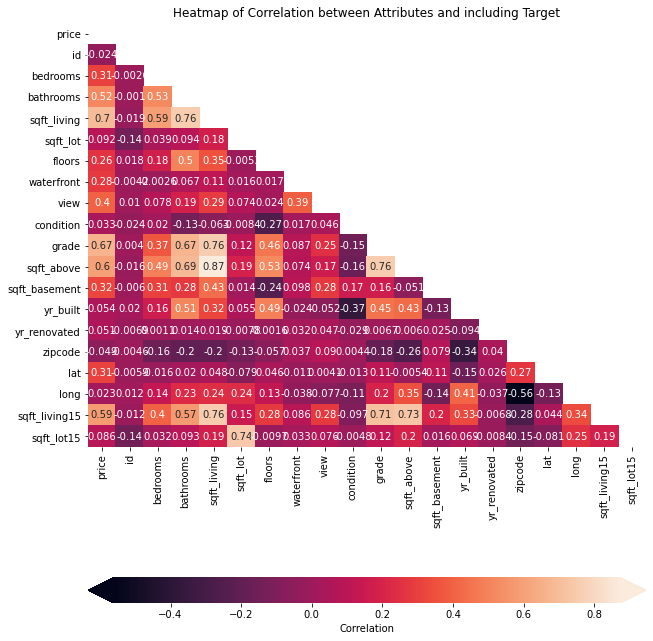

In [18]:
fig, ax = plt.subplots(figsize = (10, 12))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title('Heatmap of Correlation between Attributes and including Target');

In [19]:
most_correlated_feature = 'sqft_living'

Text(0.5, 1.0, 'Most Correlated Feature vs. Price')

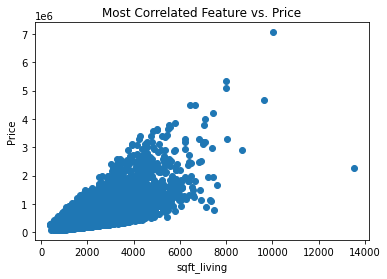

In [20]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel('Price')
ax.set_title('Most Correlated Feature vs. Price')

In [21]:
X_test = X_test
X_train = X_train.drop(['view', 'date', 'sqft_above', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis = 1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,zipcode
15714,2450000275,4,1.50,1350,8113,1.0,0.0,4,7,0.0,1959,98004
10920,1574700140,3,1.75,1830,9720,1.0,0.0,3,7,680.0,1928,98040
2782,3601200465,4,2.75,3527,7200,2.0,0.0,3,7,0.0,2005,98198
14991,5437400630,4,2.25,1920,8259,2.0,0.0,4,8,0.0,1979,98027
19542,6169901095,4,2.00,1980,7200,2.0,0.0,3,8,280.0,1910,98119
...,...,...,...,...,...,...,...,...,...,...,...,...
11323,5104532030,4,3.50,3400,5222,2.0,0.0,3,9,0.0,2005,98038
12006,8964800390,3,1.75,2430,12757,1.0,0.0,4,8,1090.0,1952,98004
5409,8058500005,2,1.00,1620,5400,1.0,0.0,3,6,0.0,1926,98125
866,3955900830,3,2.50,3460,6590,2.0,0.0,3,7,0.0,2001,98056


In [22]:
X_train = X_train.drop(['id', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'zipcode'], axis = 1)

In [23]:
X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric

,bedrooms,bathrooms,floors,waterfront,condition,grade
15714,4,1.50,1.0,0.0,4,7
10920,3,1.75,1.0,0.0,3,7
2782,4,2.75,2.0,0.0,3,7
14991,4,2.25,2.0,0.0,4,8
19542,4,2.00,2.0,0.0,3,8
...,...,...,...,...,...,...
11323,4,3.50,2.0,0.0,3,9
12006,3,1.75,1.0,0.0,4,8
5409,2,1.00,1.0,0.0,3,6
866,3,2.50,2.0,0.0,3,7


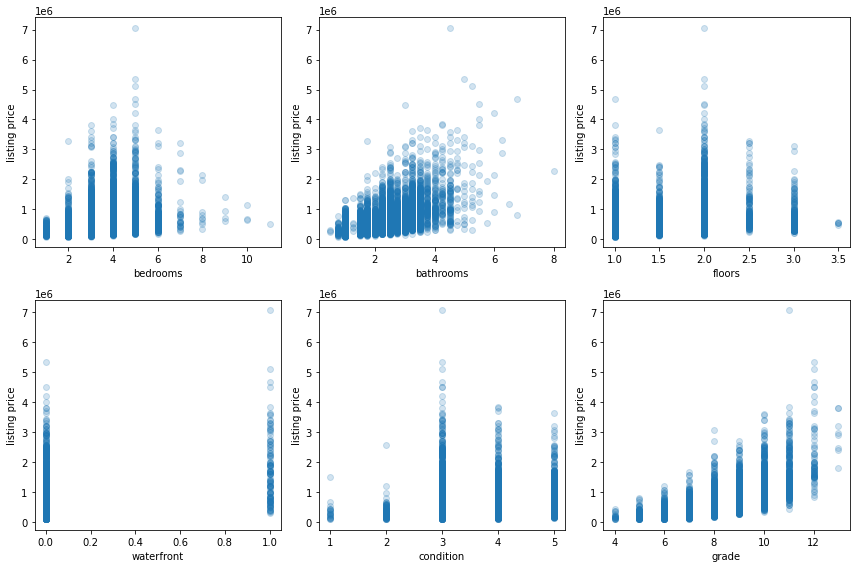

In [24]:
scatterplot_data = X_train_numeric

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

KeyError: 'zipcode'

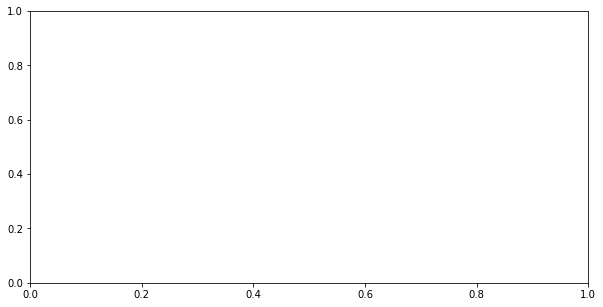

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(X_train_numeric['zipcode'], bins=100)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("");

KeyError: 'yr_built'

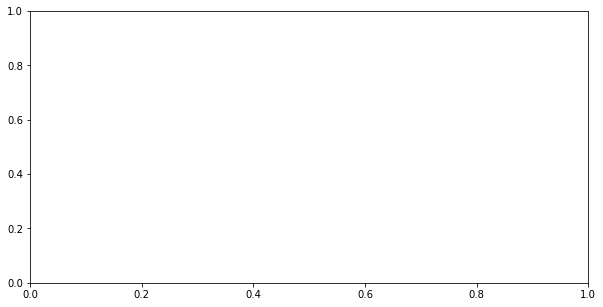

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(X_train_numeric['yr_built'], bins=100)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("");

In [46]:
X_train_second_model = X_train_numeric
X_train_second_model['bathrooms'].value_counts()

2.50    4302
1.00    3063
1.75    2426
2.25    1656
2.00    1512
1.50    1167
2.75     945
3.00     607
3.50     588
3.25     456
3.75     123
4.00     107
4.50      82
4.25      59
0.75      56
4.75      18
5.00      17
5.25      12
5.50      10
1.25       6
6.00       4
0.50       3
6.25       2
6.75       2
5.75       2
6.50       1
8.00       1
Name: bathrooms, dtype: int64

In [47]:
br_dummies = pd.get_dummies(X_train_second_model['bedrooms'], prefix = 'bed', drop_first = True)
bath_dummies = pd.get_dummies(X_train_second_model['bathrooms'], prefix = 'bath', drop_first = True)
floors_dummies = pd.get_dummies(X_train_second_model['floors'], prefix = 'floors', drop_first = True)
wf_dummies = pd.get_dummies(X_train_second_model['waterfront'], prefix = 'wf', drop_first = True)
condition_dummies = pd.get_dummies(X_train_second_model['condition'], prefix = 'cond', drop_first = True)
grade_dummies = pd.get_dummies(X_train_second_model['grade'], prefix = 'gr', drop_first = True)


In [29]:
X_train_second_model = X_train_second_model.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade'], axis = 1)

In [ ]:
#X_train_second_model = pd.concat([br_dummies, bath_dummies, floors_dummies, wf_dummies, condition_dummies, grade_dummies], axis = 1)

In [32]:
X_br_cond = pd.concat([br_dummies, condition_dummies], axis = 1)

In [77]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

br_cond_model = LinearRegression()

br_cond_model_scores = cross_validate(
    estimator= br_cond_model,
    X= X_br_cond,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", br_cond_model_scores["train_score"].mean())
print("Validation score:", br_cond_model_scores["test_score"].mean())

Current Model
Train score:      0.10812794113977717
Validation score: 0.1049829584946625


In [39]:
X_bath_cond = pd.concat([bath_dummies, condition_dummies], axis = 1)

In [78]:
bath_cond_model = LinearRegression()

bath_cond_model_scores = cross_validate(
    estimator= bath_cond_model,
    X= X_bath_cond,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", bath_cond_model_scores["train_score"].mean())
print("Validation score:", bath_cond_model_scores["test_score"].mean())

Current Model
Train score:      0.34985807901546284
Validation score: 0.32724524972007346


In [42]:
X_cond = condition_dummies

In [79]:
cond_model = LinearRegression()

cond_model_scores = cross_validate(
    estimator= cond_model,
    X= X_cond,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", cond_model_scores["train_score"].mean())
print("Validation score:", cond_model_scores["test_score"].mean())

Current Model
Train score:      0.007126564410398828
Validation score: 0.006207536651571211


In [44]:
X_gr = grade_dummies

In [80]:
grade_model = LinearRegression()

grade_model_scores = cross_validate(
    estimator= grade_model,
    X= X_gr,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", grade_model_scores["train_score"].mean())
print("Validation score:", grade_model_scores["test_score"].mean())

Current Model
Train score:      0.5075615675352529
Validation score: 0.5035339631841611


In [48]:
X_br = br_dummies

In [81]:
bedroom_model = LinearRegression()

bedroom_model_scores = cross_validate(
    estimator= bedroom_model,
    X= X_br,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", bedroom_model_scores["train_score"].mean())
print("Validation score:", bedroom_model_scores["test_score"].mean())

Current Model
Train score:      0.10352241040025616
Validation score: 0.10110926502730859


In [50]:
X_bath = bath_dummies

In [82]:
bathroom_model = LinearRegression()

bathroom_model_scores = cross_validate(
    estimator= bathroom_model,
    X= X_bath,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", bathroom_model_scores["train_score"].mean())
print("Validation score:", bathroom_model_scores["test_score"].mean())

Current Model
Train score:      0.34016646252182897
Validation score: 0.31806688028349994


In [52]:
X_floors = floors_dummies

In [83]:
floors_model = LinearRegression()

floors_model_scores = cross_validate(
    estimator= floors_model,
    X= X_floors,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", floors_model_scores["train_score"].mean())
print("Validation score:", floors_model_scores["test_score"].mean())

Current Model
Train score:      0.08415893728332187
Validation score: 0.08322277321743557


In [54]:
X_wf = wf_dummies

In [84]:
wf_model = LinearRegression()

wf_model_scores = cross_validate(
    estimator= wf_model,
    X= X_wf,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", wf_model_scores["train_score"].mean())
print("Validation score:", wf_model_scores["test_score"].mean())

Current Model
Train score:      0.07889426131083373
Validation score: 0.0767040793915897


In [56]:
X_bath_grade = pd.concat([bath_dummies, grade_dummies], axis = 1)

In [85]:
bath_grade_model = LinearRegression()

bath_grade_model_scores = cross_validate(
    estimator= bath_grade_model,
    X= X_bath_grade,
    y=y_train,
    return_train_score=True,
    cv= None
)

print("Current Model")
print("Train score:     ", bath_grade_model_scores["train_score"].mean())
print("Validation score:", bath_grade_model_scores["test_score"].mean())

Current Model
Train score:      0.5491703858552235
Validation score: 0.5283548028666573
